## Préparation et modélisation des données

In [1]:
import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Lecture du dataset

df = pd.read_csv("kc_house_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21611 non-null float64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 3.5+ MB


In [2]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


### Pré-traitement des données et standardisation

In [5]:
df = df.dropna()
scaler = preprocessing.StandardScaler().fit(df)
df[df.columns] = pd.DataFrame(scaler.transform(df), index = df.index)

df.head()

C:\Users\Edooby\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.886129,-0.866671,-0.398712,-1.447519,-0.979804,-0.228329,-0.915444,-0.087177,-0.305775,-0.629163,-0.558827,-0.734681,-0.658695,-0.545013,-0.210139,1.870111,-0.352512,-0.306092,-0.943331,-0.260725
1,0.637496,-0.005679,-0.398712,0.175564,0.533695,-0.189895,0.936439,-0.087177,-0.305775,-0.629163,-0.558827,0.460814,0.245307,-0.681199,4.746448,0.879527,1.161581,-0.746345,-0.432681,-0.187880
2,0.365432,-0.980799,-1.473899,-1.447519,-1.426232,-0.123311,-0.915444,-0.087177,-0.305775,-0.629163,-1.409547,-1.229785,-0.658695,-1.294034,-0.210139,-0.933427,1.283545,-0.135672,1.070090,-0.172389
3,-0.727658,0.174091,0.676476,1.149414,-0.130502,-0.244022,-0.915444,-0.087177,-0.305775,2.444263,-0.558827,-0.891665,1.397909,-0.204549,-0.210139,1.085120,-0.283231,-1.271809,-0.914151,-0.284530
4,-0.912882,-0.081946,-0.398712,-0.149052,-0.435380,-0.169664,-0.915444,-0.087177,-0.305775,-0.629163,0.291892,-0.130896,-0.658695,0.544471,-0.210139,-0.073676,0.409586,1.199289,-0.272191,-0.192861


### Echantillonnage des données

In [6]:
data = df.drop(['price'], axis=1)
target = df.price
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

### Heatmap - Corrélations entre toutes les varibales du dataframe

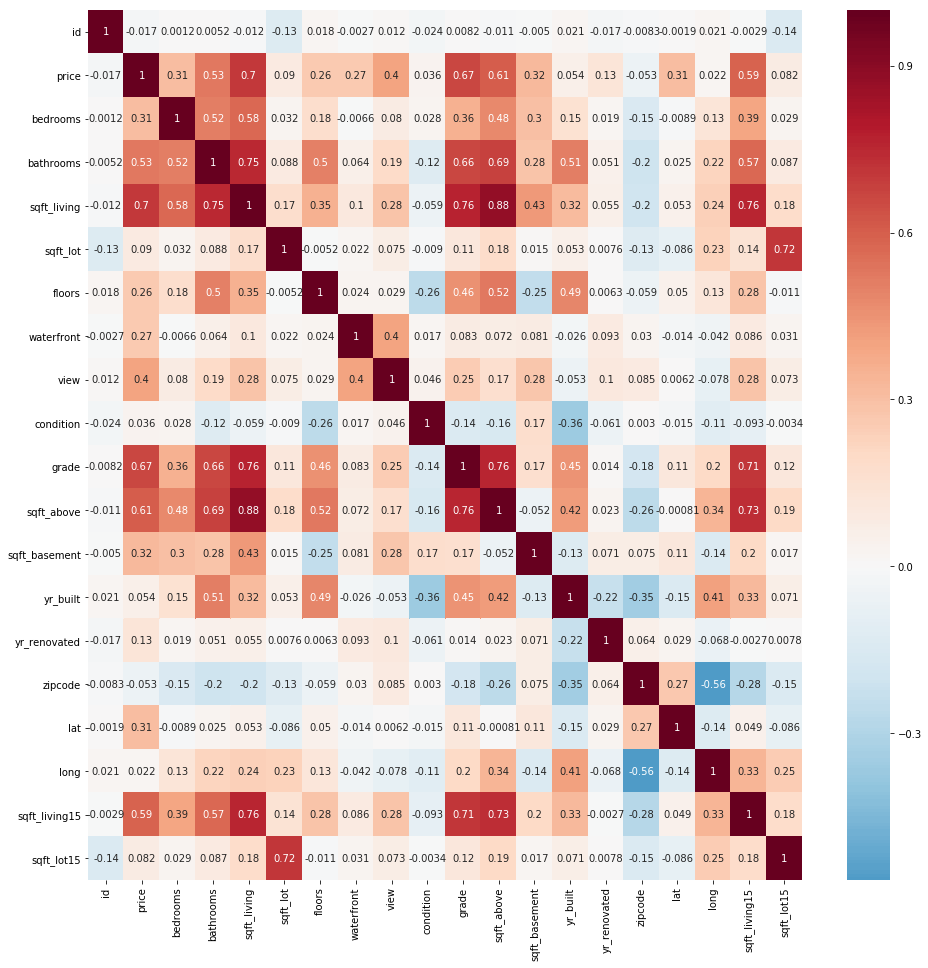

In [7]:
import seaborn as sns

plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap="RdBu_r", center=0);

La variable **sqft_living** est visiblement la plus corrélée à la valeur cible, elle va donc être utilisée pour créer un modèle de régression linéaire simple, permettant de prédire le prix en fonction du nombre d'étage.

### Modèle de régression linéaire simple

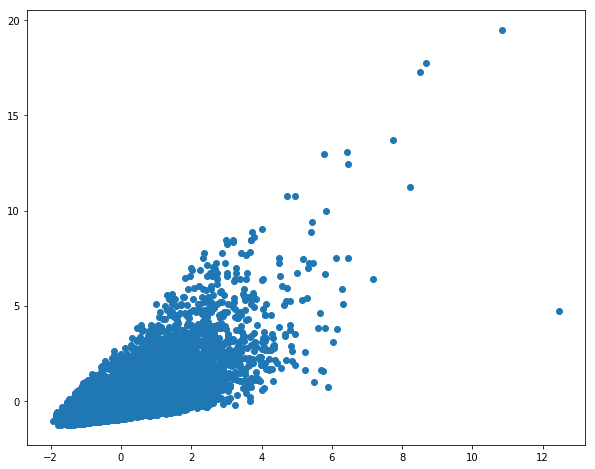

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(df.sqft_living, df.price)
plt.show();

In [9]:
model_1 = LinearRegression()
model_1.fit(X_train[['sqft_living']], y_train)

print("score train: ", model_1.score(X_train[['sqft_living']], y_train))
print("score test: ", model_1.score(X_test[['sqft_living']], y_test))

pred = model_1.predict(X_train[['sqft_living']])
pred_test = model_1.predict(X_test[['sqft_living']])

print("rmse train:", np.sqrt(mean_squared_error(y_train, pred)))
print("rmse test: ", np.sqrt(mean_squared_error(y_test, pred_test)))

score train:  0.4953330420235871
score test:  0.48266835685302184
rmse train: 0.711051738747405
rmse test:  0.7164419915282619


In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04,2.161100e+04
mean,-3.795441e-17,2.399122e-17,1.476934e-15,-2.352064e-15,1.844395e-16,8.605500e-17,-2.286885e-14,1.517649e-15,-1.370068e-16,-1.865117e-14,-9.378099e-16,1.385326e-16,-6.040187e-15,-1.278901e-15,-4.578461e-15,-1.302709e-13,5.846331e-14,-2.007357e-14,-7.232298e-17,8.362249e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.591965e+00,-1.266797e+00,-3.624275e+00,-2.745986e+00,-1.948880e+00,-3.521783e-01,-9.154443e-01,-8.717670e-02,-3.057749e-01,-3.702588e+00,-5.663146e+00,-1.809419e+00,-6.586948e-01,-2.417566e+00,-2.101385e-01,-1.438064e+00,-2.916655e+00,-2.166517e+00,-2.316250e+00,-4.438067e-01
25%,-8.542523e-01,-5.947684e-01,-3.987115e-01,-4.736690e-01,-7.119476e-01,-2.430559e-01,-9.154443e-01,-8.717670e-02,-3.057749e-01,-6.291626e-01,-5.588274e-01,-7.226055e-01,-6.586948e-01,-6.811990e-01,-2.101385e-01,-8.399761e-01,-6.429900e-01,-8.102530e-01,-7.244807e-01,-2.808679e-01
50%,-2.347961e-01,-2.453733e-01,-3.987115e-01,1.755643e-01,-1.849447e-01,-1.808175e-01,1.049723e-02,-8.717670e-02,-3.057749e-01,-6.291626e-01,-5.588274e-01,-2.758044e-01,-6.586948e-01,1.359146e-01,-2.101385e-01,-2.418879e-01,8.482824e-02,-1.143691e-01,-2.138305e-01,-1.885763e-01
75%,9.485657e-01,2.857671e-01,6.764763e-01,5.001809e-01,5.119185e-01,-1.066892e-01,9.364387e-01,-8.717670e-02,-3.057749e-01,9.075500e-01,2.918924e-01,5.091164e-01,6.069074e-01,8.849355e-01,-2.101385e-01,7.486956e-01,8.512566e-01,6.312208e-01,5.448498e-01,-9.835382e-02
max,1.849340e+00,1.950215e+01,3.185692e+01,7.641747e+00,1.247837e+01,3.950257e+01,3.714263e+00,1.147096e+01,4.913895e+00,2.444263e+00,4.545492e+00,9.203624e+00,1.023452e+01,1.497771e+00,4.806196e+00,2.262606e+00,1.570054e+00,6.382915e+00,6.162002e+00,3.143890e+01


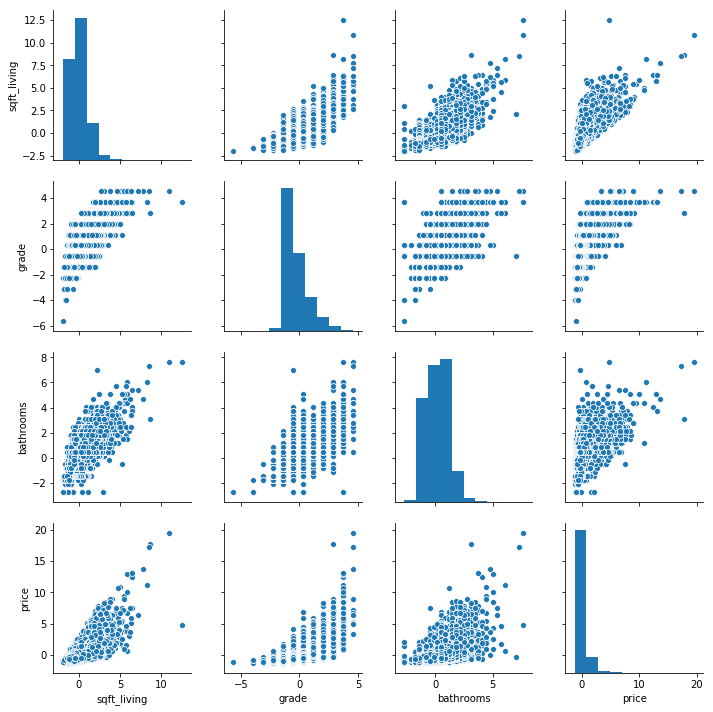

In [11]:
sns.pairplot(df[['sqft_living', 'grade', 'bathrooms','price']]);

In [12]:
print("intercept", model_1.intercept_)
print("coeff estimé", model_1.coef_)

intercept -0.00240520307835132
coeff estimé [0.70517064]


In [13]:
# Evaluation du modèle
prix = df.price
sl = df[['sqft_living']]

cross_validate(model_1, sl, prix, return_train_score =True, cv=4 )

{'fit_time': array([0.00529814, 0.00099778, 0.00504065, 0.00099778]),
 'score_time': array([0., 0., 0., 0.]),
 'test_score': array([0.48415063, 0.49346015, 0.49449061, 0.49662829]),
 'train_score': array([0.49598573, 0.49233627, 0.49234577, 0.49082362])}

In [14]:
print("Moyenne des score obtenus sur test",cross_validate(model_1, sl, prix, return_train_score =True, cv=4 )['test_score'].mean())

Moyenne des score obtenus sur test 0.49218241943994445


In [15]:
pred_prix = model_1.predict(sl)
residus = pred_prix - prix
residus.describe()

count    21611.000000
mean        -0.002405
std          0.712146
min        -11.849240
25%         -0.293376
50%          0.062278
75%          0.399485
max          4.057798
Name: price, dtype: float64

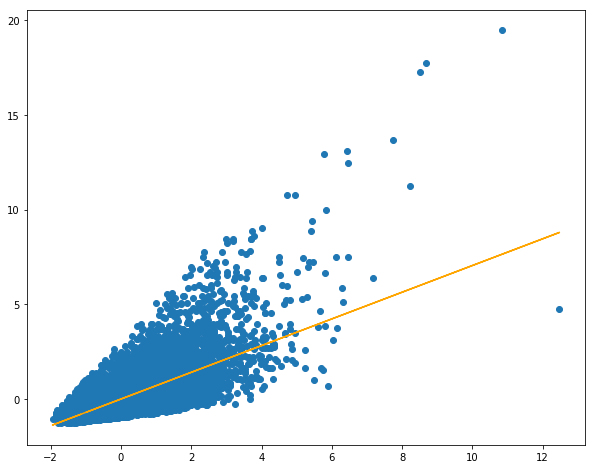

In [16]:
# Affichage nuage de point + droite de regression

plt.figure(figsize= (10,8))
plt.scatter(sl['sqft_living'], prix)
plt.plot(sl, pred_prix, color='orange');

In [17]:
from sklearn.feature_selection import f_regression

freg = f_regression(sl, prix)

print('F-score:', freg[0])
print('p-value:', freg[1])


F-score: [21002.36077166]
p-value: [0.]


In [18]:
def rmse(prediction, target):
    return np.sqrt(((prediction - target)**2).mean())

print("RMSE prix: ", rmse(pred_prix, prix))


RMSE prix:  0.7121332532777257


In [19]:
pred_prix2 = cross_val_predict(model_1, sl, prix, cv=4)
rmse = rmse(pred_prix2, prix)
print("RMSE prix 2: ", rmse)

RMSE prix 2:  0.7123140876024872


### Régression linéaire multiple

In [20]:
import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline 

import scipy.stats as stats
import seaborn as sns

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

feats = list(data.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index = feats)

,valeur estimée
intercept,-0.001970
id,-0.006113
bedrooms,-0.093981
bathrooms,0.083303
sqft_living,0.226769
sqft_lot,0.015418
floors,0.007323
waterfront,0.139255
view,0.107112
condition,0.048930


In [23]:
print("Coefficient de détermination du modèle :", lr.score(X_train, y_train))
print("Coefficient de détermination obtenu par Cv :", cross_val_score(lr,X_train,y_train))

Coefficient de détermination du modèle : 0.6984460364388676
Coefficient de détermination obtenu par Cv : [0.69406461 0.69003894 0.70418924]


In [24]:
print("Coefficient de détermination du modèle :", lr.score(X_test, y_test))

Coefficient de détermination du modèle : 0.7049375708338288


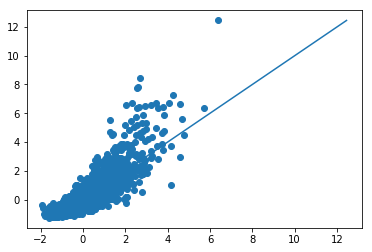

In [25]:
pred_test = lr.predict(X_test)
plt.scatter(pred_test, y_test)
plt.plot((y_test.min(),y_test.max()), (y_test.min(),y_test.max()));

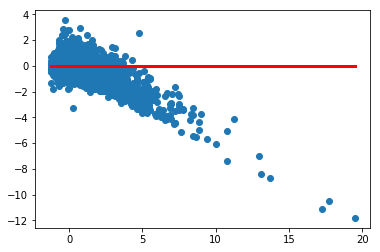

In [26]:
pred_train = lr.predict(X_train)
residus = pred_train - y_train

plt.scatter(y_train, residus)
plt.plot((y_train.min(), y_train.max()), (0,0), lw=3, color='red');

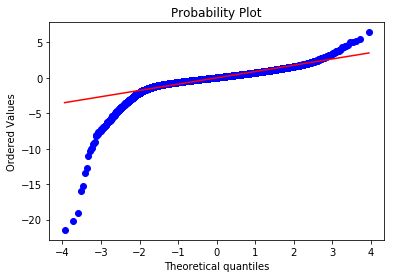

In [27]:
residus_norm = (residus-residus.mean())/residus.std()

stats.probplot(residus_norm, plot=plt)
plt.show();

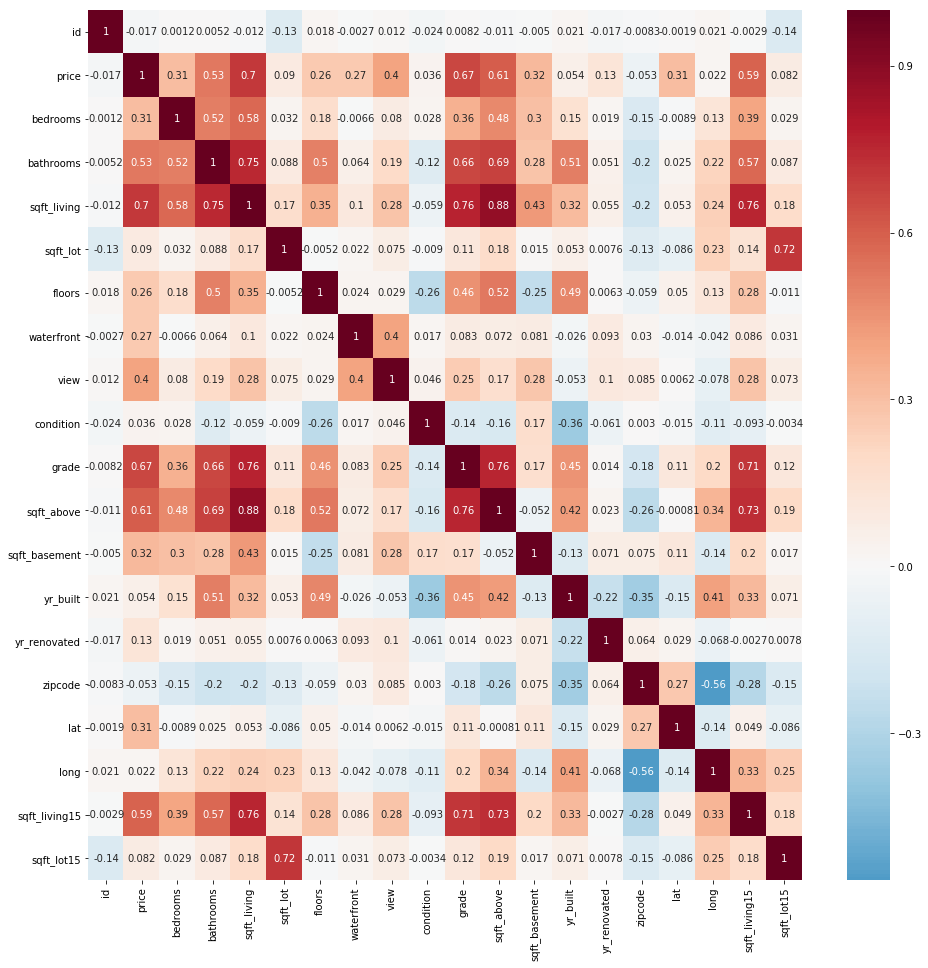

In [28]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),  annot=True, cmap="RdBu_r", center =0);

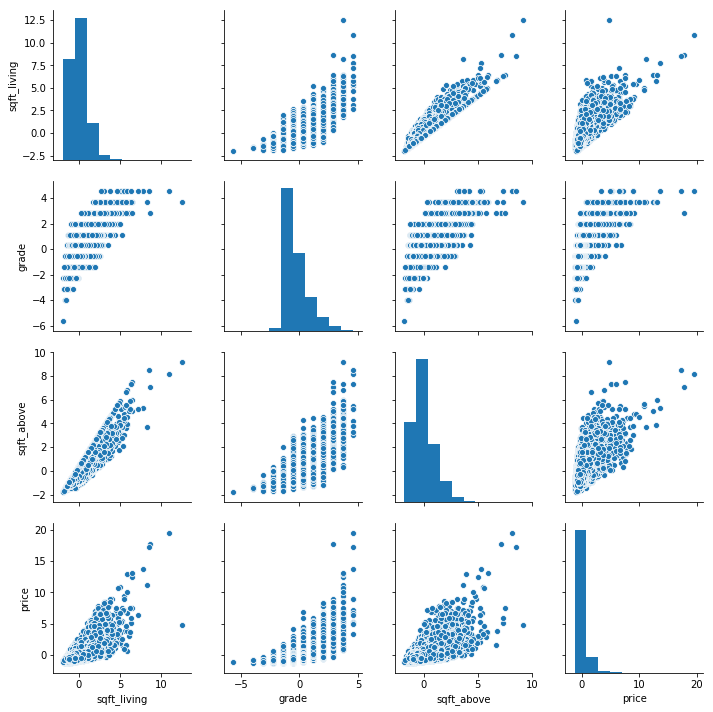

In [29]:
sns.pairplot(df[[ 'sqft_living', 'grade', 'sqft_above', 'price']])

In [30]:
signif_features = ['sqft_living', 'grade', 'sqft_above']
lr2 = LinearRegression()
lr2.fit(X_train[signif_features], y_train)

print("score lr2: ", lr2.score(X_train[signif_features], y_train))

score lr2:  0.5413770379510587


In [31]:
print("score lr2 (test): ", lr2.score(X_test[signif_features], y_test))

score lr2 (test):  0.5395301085509432


In [32]:
from sklearn.feature_selection import SelectKBest, f_regression

sk = SelectKBest(f_regression, k=3)
sk.fit(data, target)

data.columns[sk.get_support()]

Index(['sqft_living', 'grade', 'sqft_above'], dtype='object')

In [33]:
sk_train = sk.transform(X_train)
sk_test = sk.transform(X_test)

lr3 = LinearRegression()
lr3.fit(sk_train, y_train)

print("score lr3 (train): ", lr3.score(sk_train, y_train))
print("score lr3 (test): ", lr3.score(sk_test, y_test))

score lr3 (train):  0.5413770379510587
score lr3 (test):  0.5395301085509432


In [34]:
from sklearn.feature_selection import SelectFromModel

lr4 = LinearRegression()
sfm = SelectFromModel(lr4)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sfm_train = sfm.fit_transform(X_train_scaled, y_train)
sfm_test = sfm.transform(X_test_scaled)

In [35]:
data.columns[sfm.get_support()]

Index(['sqft_living', 'waterfront', 'view', 'grade', 'sqft_above', 'yr_built',
       'lat'],
      dtype='object')

In [41]:
best_features = ['sqft_living', 'waterfront', 'view', 'grade', 'sqft_above', 'yr_built','lat']
lr5 = LinearRegression()
lr5.fit(sfm_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print("score lr5 (train): ", lr5.score(sfm_train, y_train))
print("score lr5 (test): ", lr5.score(sfm_test, y_test))

score lr5 (train):  0.6825688516466013
score lr5 (test):  0.6914123428585394


In [44]:
# Regression Ridge
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV(alphas = (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [46]:
print("Alpha: ", ridge_reg.alpha_)
print("Score Ridge (train): ", ridge_reg.score(X_train, y_train))
print("Score Ridge (test): ", ridge_reg.score(X_test, y_test))

Alpha:  100.0
Score Ridge (train):  0.6984300203086833
Score Ridge (test):  0.7049232091003043


In [47]:
ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

print(" Erreur quadratique moyenne (train): ", mean_squared_error(y_train, ridge_pred_train))
print(" Erreur quadratique moyenne (test): ", mean_squared_error(y_test, ridge_pred_test))

 Erreur quadratique moyenne (train):  0.3021242888164364
 Erreur quadratique moyenne (test):  0.29277101153896057


In [48]:
# Regression Lasso

from sklearn.linear_model import Lasso
lasso_r = Lasso()
lasso_r.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
print("Coefficients estimés: \n", lasso_r.coef_)

Coefficients estimés: 
 [-0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.
  0.]


Tous les coefficients sont nuls. Manifestement, la valeur  α=1.0  ne convient pas à nos données.

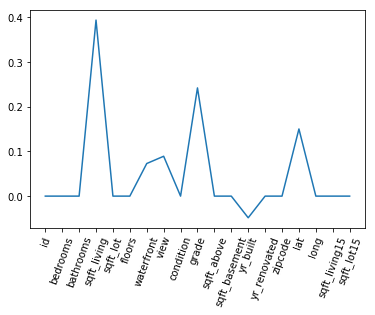

In [50]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

plt.plot(range(len(data.columns)), lasso_reg.coef_)
plt.xticks(range(len(data.columns)), data.columns.values, rotation=70)
plt.show();

In [51]:
print("Score lasso alpha = 0.1 (train): ", lasso_reg.score(X_train, y_train))
print("Score lasso alpha = 0.1 (test): ", lasso_reg.score(X_test, y_test))

Score lasso alpha = 0.1 (train):  0.635201119701795
Score lasso alpha = 0.1 (test):  0.6395890696599696


In [52]:
lasso_pred_train = lasso_reg.predict(X_train)
lasso_pred_test = lasso_reg.predict(X_test)

print("mse (train): ", mean_squared_error(y_train, lasso_pred_train))
print("mse (test): ", mean_squared_error(y_test, lasso_pred_test))

mse (train):  0.36546940907029857
mse (test):  0.35759461909431167


In [53]:
from sklearn.linear_model import lasso_path

mes_alphas = (0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0)

alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=mes_alphas)

print("dimension coefs_lasso: ", coefs_lasso.shape)

dimension coefs_lasso:  (19, 10)


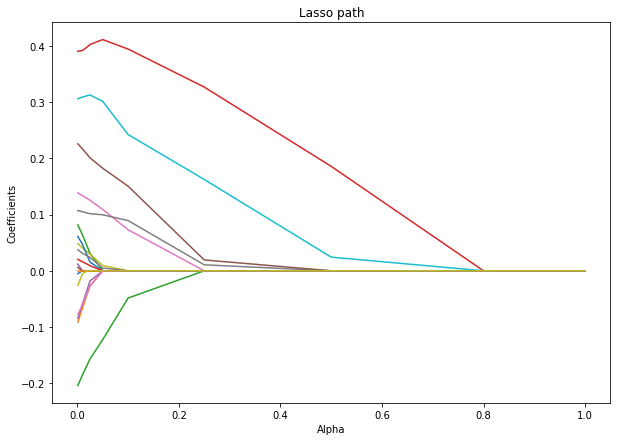

In [54]:
plt.figure(figsize=(10,7))

for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path, coefs_lasso[i,:])

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show();

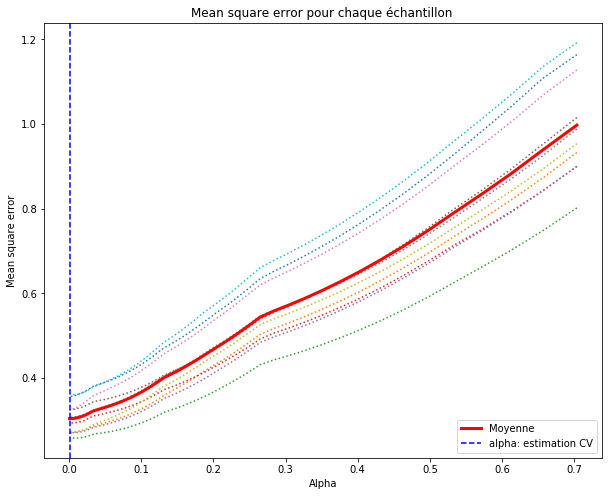

In [55]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(cv=10)
model_lasso.fit(X_train, y_train)
alphas = model_lasso.alphas_

plt.figure(figsize=(10,8))
plt.plot(alphas, model_lasso.mse_path_, ':')
plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'red',
         label='Moyenne', linewidth=3)
plt.axvline(model_lasso.alpha_, linestyle='--', color='blue',
            label='alpha: estimation CV')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon ')
plt.show();

In [56]:
pred_test = model_lasso.predict(X_test)

print("score: ", model_lasso.score(X_test, y_test))
print("mse: ", mean_squared_error(pred_test, y_test))

score:  0.7048839888354275
mse:  0.29280992533013267


In [57]:
# Elastic Net
import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

from sklearn.linear_model import ElasticNetCV

model_en = ElasticNetCV(cv = 8, l1_ratio = (0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
                       alphas= (0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0))

model_en.fit(X_train, y_train)

C:\Users\Edooby\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
       copy_X=True, cv=8, eps=0.001, fit_intercept=True,
       l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99),
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [58]:
coeffs = list(model_en.coef_)
coeffs.insert(0, model_en.intercept_)
feats = list(data.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index = feats)

,valeur estimée
intercept,-0.001973
id,-0.006008
bedrooms,-0.093426
bathrooms,0.083027
sqft_living,0.301966
sqft_lot,0.015064
floors,0.007269
waterfront,0.139099
view,0.107138
condition,0.048908


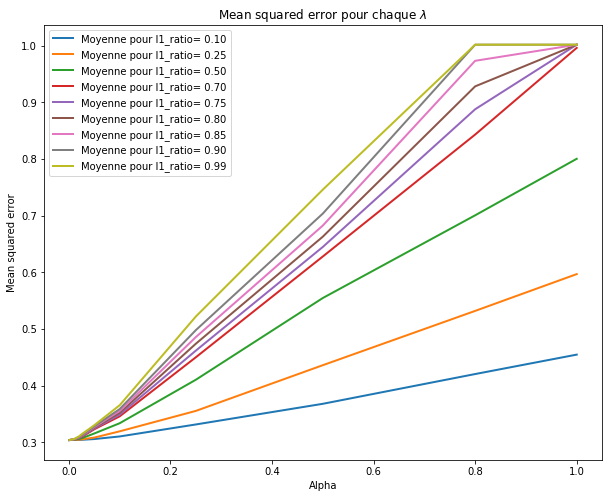

In [59]:
alphas = model_en.alphas_
plt.figure(figsize=(10, 8))

for i in range(model_en.mse_path_.shape[0]) :
    plt.plot(alphas, model_en.mse_path_[i,:,:].mean(axis=1),
         label='Moyenne pour l1_ratio= %.2f' %model_en.l1_ratio[i], linewidth=2)

plt.legend()

plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error pour chaque $\lambda$')
plt.show();

In [60]:
pred_train = model_en.predict(X_train)
pred_test = model_en.predict(X_test)

print("rmse (train): ", np.sqrt(mean_squared_error(y_train, pred_train)))
print("rmse (test): ", np.sqrt(mean_squared_error(y_test, pred_test)))

print("score Elastic Net (train): ", model_en.score(X_train, y_train))
print("score Elastic Net (test): ", model_en.score(X_test, y_test))

rmse (train):  0.549644537609944
rmse (test):  0.5410725505112066
score Elastic Net (train):  0.698445163566183
score Elastic Net (test):  0.7049348063453739


In [61]:
moy = scaler.mean_[-1]
ec = scaler.scale_[-1]

print("moyenne: ", moy)
print("ecart-type: ", ec)

moyenne:  0.001739240576201738
ecart-type:  0.9839923218121609


In [63]:
pd.DataFrame({'prix_obsérvés': (y_test*ec)+moy, 'prix_predits' : np.round((pred_test*ec)+moy)}, index = X_test.index).head(10)

,prix_obsérvés,prix_predits
16912,-0.517106,-0.0
3922,-0.289290,-0.0
11454,0.832372,1.0
4169,-0.823989,-1.0
18364,-0.748943,-1.0
20382,-0.274549,-0.0
864,-0.695339,-1.0
6411,-0.027971,-0.0
14099,0.162323,1.0
1770,4.852665,3.0


Les différents scores des modèles de regression ne sont pas très performant et ne permettent pas une prédiction ajustée.